In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## loading the dataset

In [2]:
df = pd.read_excel("Concrete_Data.xls")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## Renaming the features

In [3]:
df.columns = ['cement' , 'blastFurnance' , 'flyAsh' , 'waterComponent' , 'superplasticiser' , 'coarseAggregate' , 'fineAggregate' , 'age' ,'strength']
df.head()

,cement,blastFurnance,flyAsh,waterComponent,superplasticiser,coarseAggregate,fineAggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## Checking the info

In [4]:
df.shape

(1030, 9)

In [5]:
df.isnull().sum()

cement              0
blastFurnance       0
flyAsh              0
waterComponent      0
superplasticiser    0
coarseAggregate     0
fineAggregate       0
age                 0
strength            0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(25)

In [7]:
## removing the duplicated rows
df.drop_duplicates()

,cement,blastFurnance,flyAsh,waterComponent,superplasticiser,coarseAggregate,fineAggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   blastFurnance     1030 non-null   float64
 2   flyAsh            1030 non-null   float64
 3   waterComponent    1030 non-null   float64
 4   superplasticiser  1030 non-null   float64
 5   coarseAggregate   1030 non-null   float64
 6   fineAggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
df.describe()

,cement,blastFurnance,flyAsh,waterComponent,superplasticiser,coarseAggregate,fineAggregate,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


## EDA

<Axes: >

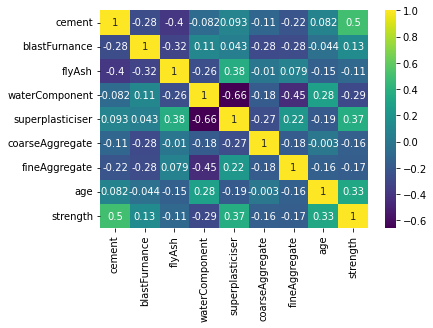

In [10]:
## checking the correlation
import seaborn as sns
sns.heatmap(df.corr() , annot=True , cmap='viridis' , cbar = True)

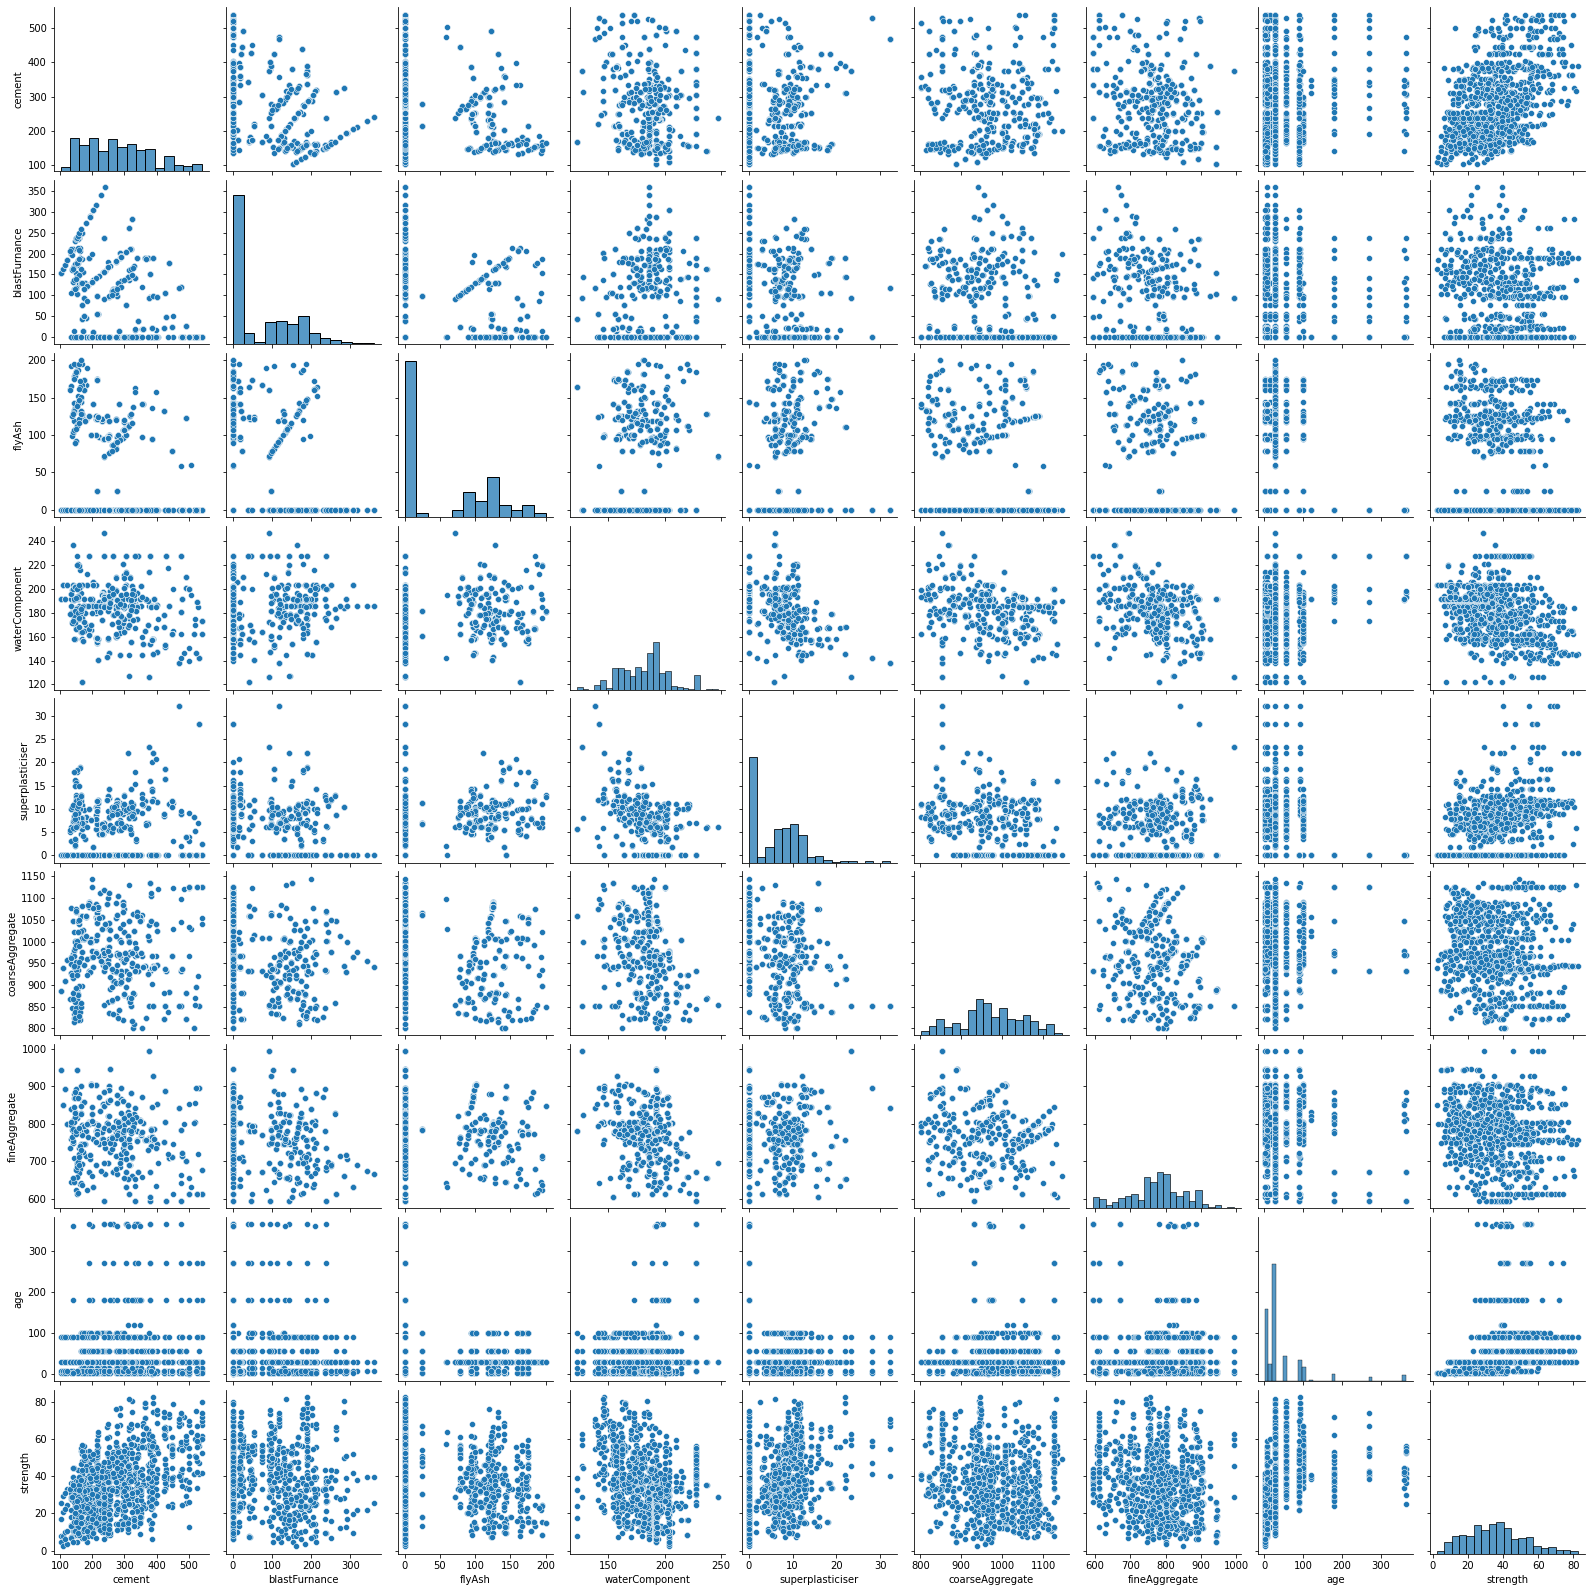

In [11]:
sns.pairplot(df)

## Splitting

In [12]:
X = df.drop(columns=['strength'] , axis =1)
y = df['strength']

In [13]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

print("X_train : " , X_train.shape)
print("X_test : " , X_test.shape)
print("y_train : " , y_train.shape)
print("y_test : " , y_test.shape)

X_train :  (824, 8)
X_test :  (206, 8)
y_train :  (824,)
y_test :  (206,)


In [14]:
cols = X_train.columns
len(cols)

8

In [15]:
X_train

,cement,blastFurnance,flyAsh,waterComponent,superplasticiser,coarseAggregate,fineAggregate,age
995,158.60,148.90,116.00,175.10,15.00,953.3,719.70,28
507,424.00,22.00,132.00,178.00,8.48,822.0,750.00,28
334,275.07,0.00,121.35,159.48,9.90,1053.6,777.50,3
848,252.00,97.00,76.00,194.00,8.00,835.0,821.00,28
294,168.88,42.22,124.25,158.33,10.83,1080.8,796.15,3
...,...,...,...,...,...,...,...,...
87,286.30,200.90,0.00,144.70,11.20,1004.6,803.70,3
330,246.83,0.00,125.08,143.30,11.99,1086.8,800.89,14
466,190.34,0.00,125.18,166.61,9.88,1079.0,798.90,100
121,475.00,118.80,0.00,181.10,8.90,852.1,781.50,28


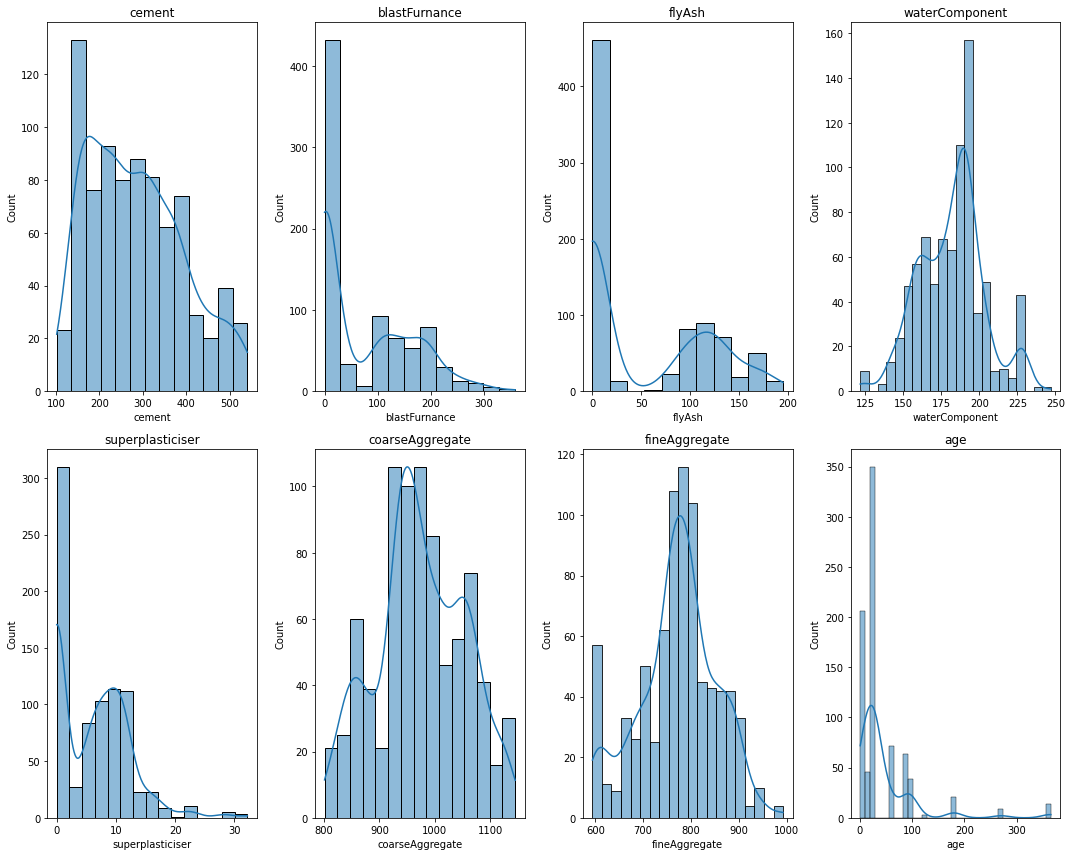

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

n_rows, n_cols = 2, 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(X_train[col], kde=True, ax=axes[i])  # KDE and Histogram together
    axes[i].set_title(col)

for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])  # Clean up any unused axes

plt.tight_layout()
plt.show()


## Applying transformation 

In [17]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [18]:
X_train_transform = pt.fit_transform(X_train)
X_test_transform = pt.transform(X_test)


In [19]:
X_train_transform = pd.DataFrame(X_train_transform , columns = X_train.columns)
X_test_transform = pd.DataFrame(X_test_transform , columns  = X_test.columns)
type(X_train_transform)

pandas.core.frame.DataFrame

In [20]:
cols = X_train_transform.columns
cols

Index(['cement', 'blastFurnance', 'flyAsh', 'waterComponent',
       'superplasticiser', 'coarseAggregate', 'fineAggregate', 'age'],
      dtype='object')

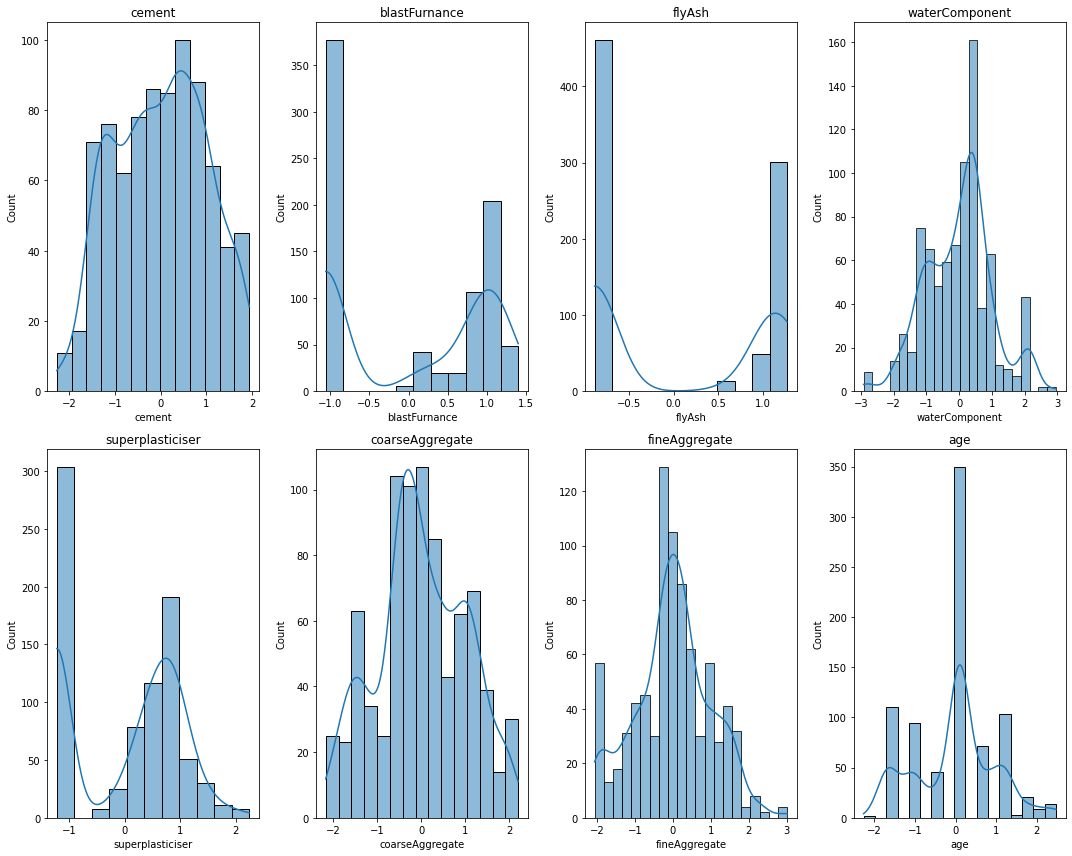

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

n_rows, n_cols = 2, 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(X_train_transform[col], kde=True, ax=axes[i])  # KDE and Histogram together
    axes[i].set_title(col)

for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])  # Clean up any unused axes

plt.tight_layout()
plt.show()

## Comparing between the two

<Axes: xlabel='cement', ylabel='Density'>

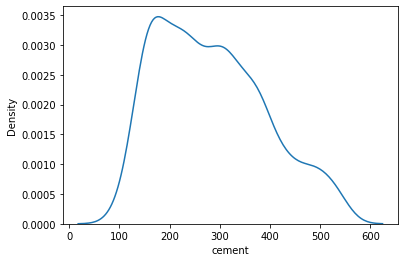

In [22]:
# plt.subplot(121)
sns.kdeplot(X_train['cement'])


# plt.subplot(122)
# sns.displot(X_train_transform['cement'])



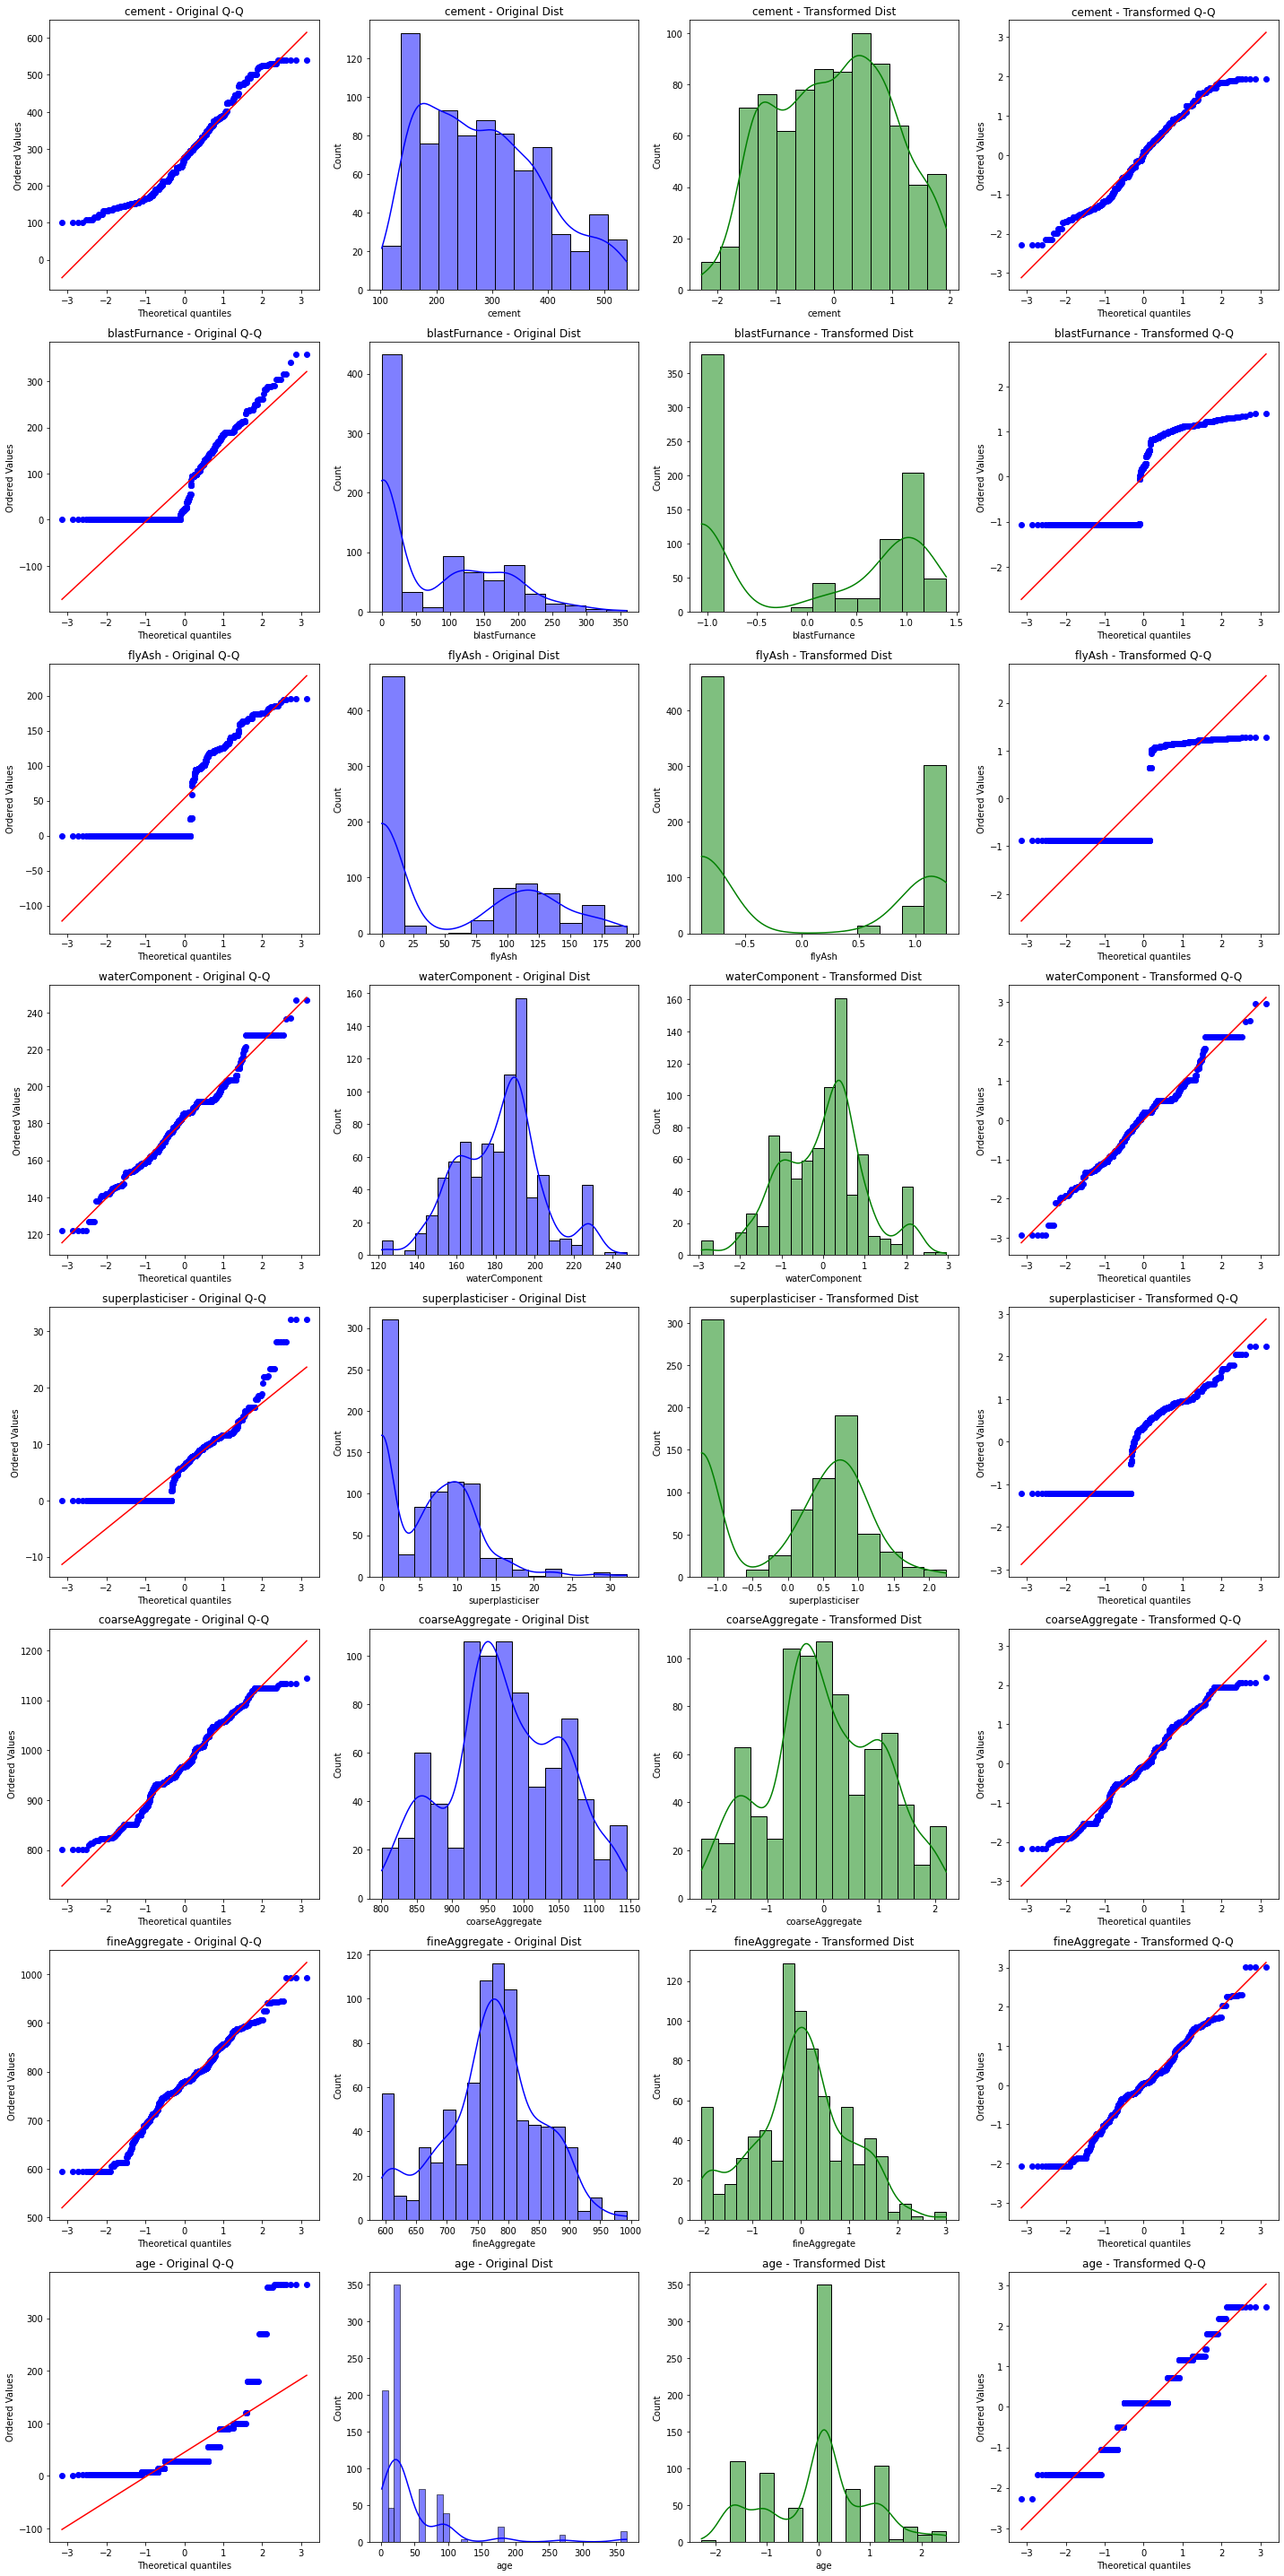

In [36]:
import scipy.stats as stats
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 40))
axes = axes.flatten()

for i, col in enumerate(X_train_transform.columns):
    # Q-Q plot original
    stats.probplot(X_train[col], dist="norm", plot=axes[4*i])
    axes[4*i].set_title(f"{col} - Original Q-Q")

    # Histogram original
    sns.histplot(X_train[col], kde=True, ax=axes[4*i + 1], color='blue')
    axes[4*i + 1].set_title(f"{col} - Original Dist")

    # Histogram transformed
    sns.histplot(X_train_transform[col], kde=True, ax=axes[4*i + 2], color='green')
    axes[4*i + 2].set_title(f"{col} - Transformed Dist")

    # Q-Q plot transformed
    stats.probplot(X_train_transform[col], dist="norm", plot=axes[4*i + 3])
    axes[4*i + 3].set_title(f"{col} - Transformed Q-Q")

plt.tight_layout()
plt.show()


## Scaling (Standard Scalar)

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_transform = sc.fit_transform(X_train_transform)
X_test_transform = sc.transform(X_test_transform)

In [39]:
X_train_transform

array([[-1.27972171,  1.01817459,  1.13100159, ..., -0.26249622,
        -0.67754738,  0.10577763],
       [ 1.24481896,  0.22256194,  1.16667886, ..., -1.91272337,
        -0.31403933,  0.10577763],
       [ 0.07950589, -1.05700975,  1.14353097, ...,  1.01841286,
         0.02598101, -1.664976  ],
       ...,
       [-0.84411355, -1.05700975,  1.15211601, ...,  1.34537397,
         0.29718076,  1.25751143],
       [ 1.56573286,  0.92179935, -0.88493157, ..., -1.53725058,
         0.07623473,  0.10577763],
       [ 0.42656572, -1.05700975,  1.12368097, ..., -0.62083037,
         0.09513185,  0.10577763]], shape=(824, 8))

## Training the model

In [41]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor

from sklearn.metrics import mean_squared_error , r2_score

In [42]:
models = {
    "lr" : LinearRegression(),
    "lss": Lasso(),
    "Ridge" : Ridge(),
    "dtr" : DecisionTreeRegressor(),
    "xgb" : XGBRFRegressor()
}

for name , md in models.items():
    md.fit(X_train_transform , y_train)
    y_pred = md.predict(X_test_transform)

    print(f"{name} : mse : {mean_squared_error(y_test , y_pred)} , r2 score : {r2_score(y_test , y_pred)}")

lr : mse : 47.36426499201718 , r2 score : 0.8161903718181495
lss : mse : 54.81039332881638 , r2 score : 0.7872936902964985
Ridge : mse : 47.38152656820333 , r2 score : 0.8161233836805495
dtr : mse : 50.26193888251783 , r2 score : 0.8049451775668516
xgb : mse : 43.52523961421651 , r2 score : 0.8310887308952546


## Selecting the best model

In [44]:
xgb = XGBRFRegressor()
xgb.fit(X_train_transform , y_train)
y_pred = xgb.predict(X_test_transform )
r2_score(y_test , y_pred)

0.8310887308952546

## Pickle

In [45]:
import pickle
pickle.dump(xgb , open('model.pkl' , 'wb'))

## Prediction

In [66]:
def pred_strength(cem,blastf , flyas , water,superplaster , courseagg , fineagg , age):
    features = np.array([[cem,blastf , flyas , water,superplaster , courseagg , fineagg , age]])
    pred = xgb.predict(features).reshape(1,-1)
    print(pred[0][0])


In [67]:
cem = 158.60
blastf = 148.90
flyas = 116.00
water = 175.10
superplaster = 15.00
courseagg = 953.3
fineagg = 719.70
age = 28

pred_strength(cem,blastf , flyas , water,superplaster , courseagg , fineagg , age)

62.92842
